# Tests of Hamiltonian

This notebook contains tests for the hamiltonian operator as defined in the context of lattice discretization.


We shall first import the functions form the functions.py script, where all the relevant functions are defined and described.

In [35]:
import functions
from functions import *
rng = functions.rng
# Import for pretty print
from termcolor import colored

### Linearity

For any wavefunctions $\hat{\Psi}$, $\hat{\Phi}$ and complex numbers $\alpha, \beta$ the following equation is true:

$\hat{H}_a(\alpha\hat{\Psi}+ \beta\hat{\Phi}) = \alpha(\hat{H}_a\hat{\Psi}) + \beta(\hat{H}_a\hat{\Phi})$

Proof:

$$ \hat{H}_a(\alpha\hat{\Psi}+ \beta\hat{\Phi}) = \dfrac{\mu}{8}(\epsilon^2\mathbf{n}^2-1)^2  (\alpha\hat{\Psi}+ \beta\hat{\Phi}) - \dfrac{1}{2\mu\epsilon^2}\sum_k(\alpha\hat{\Psi}+ \beta\hat{\Phi})(\mathbf{n}+\mathbf{e}_k) + (\alpha\hat{\Psi}+ \beta\hat{\Phi})(\mathbf{n}-\mathbf{e}_k) - 2 (\alpha\hat{\Psi}+ \beta\hat{\Phi})(\mathbf{n}) $$
$$ = \dfrac{\alpha\mu}{8}(\epsilon^2\mathbf{n}^2-1)^2 \hat{\Psi}+ \dfrac{\beta\mu}{8}(\epsilon^2\mathbf{n}^2-1)^2 \hat{\Phi} - \dfrac{1}{2\mu\epsilon^2}\sum_k\alpha\hat{\Psi}(\mathbf{n}+\mathbf{e}_k) + \alpha\hat{\Psi} (\mathbf{n}-\mathbf{e}_k) - 2 \alpha\hat{\Psi}(\mathbf{n}) + \beta\hat{\Phi}(\mathbf{n}+\mathbf{e}_k) + \beta\hat{\Phi} (\mathbf{n}-\mathbf{e}_k) - 2 \beta\hat{\Phi}(\mathbf{n}) $$
$$= \alpha(\hat{H}_a\hat{\Psi}) + \beta(\hat{H}_a\hat{\Phi})$$

$$ q.e.d.$$

To verify the properties of the hamiltonian function we have implemented in our code, we shall test through iterations of random inputs and parameters.\
Input wavefunctions and complex number variables shall be randomized for given set of parameters. In particular it is of interest to test the hamiltonian function for several dimensions as well as resolution of the lattice and parameters of the potential.\
We shall test for the following parameters:

N= 1, 5, 10, 25 \
D= 1, 2, 3\
$\mu$= 0.1 ,1, 10,  100\
$\varepsilon^{2}$ = 0.001 , 0.01, 0.1,  0.95


In [36]:
stats_latticepoints = []
stats_accuracy = []
for D in [1, 2, 3]:
    for N in [1, 5, 10, 25]:
        for k in range(-1,3):
            for epsilon_2 in [0.001, 0.01, 0.1, 0.95]:

                # Set parameters in the current environemnt                
              
                mu = 10**k
                epsilon_2 = epsilon_2
                
                # Collect stats
                stats_latticepoints.append(N**D)

                # Set global parameters in the functions environment
                functions.N = N
                functions.D = D
                functions.mu = mu
                functions.epsilon_2 = epsilon_2

                # Caluculate potential for given parameters
                functions.potential_array = potential_array_calculator()

                # Generate random complex numbers
                alpha = rng.standard_normal() + 1j * rng.standard_normal()
                beta = rng.standard_normal() + 1j * rng.standard_normal()

                # Generate random wavefunctions as complex arrays
                psi = generate_complex_ndarray(N,D)
                phi = generate_complex_ndarray(N,D)

                # Calculate two terms to be compared
                compound = hamiltonian_function(alpha*psi+beta*phi)
                single = alpha*hamiltonian_function(psi) +beta*hamiltonian_function(phi)  
                
                # This precision has only technical reason, no physical meaning
                relative_tolerance= 1.e-30
                try:
                    # Assert two terms are equal    
                    np.testing.assert_allclose(compound, single, atol = 0, rtol=relative_tolerance, err_msg=str, verbose=False)
                except AssertionError as e:    
                    print(colored(fr"""The test of unitarity passed  with {str(e).splitlines()[-1]} for parameters:
D={D} N={N} mu={mu} epsilon_2={epsilon_2}""", "green"))
                    stats_accuracy.append(float( str(e).splitlines()[-1].split(":")[1].strip()))                    
                else:
                    print(colored(fr"""The test of unitarity passed with relative precision greater than {relative_tolerance} for parameters:
D={D} N={N} mu={mu} epsilon_2={epsilon_2}""", 'green'))  
                    stats_accuracy.append(relative_tolerance)   


The test of unitarity passed  with Max relative difference: 1.19550666e-16 for parameters:
D=1 N=1 mu=0.1 epsilon_2=0.001
The test of unitarity passed  with Max relative difference: 3.28589438e-16 for parameters:
D=1 N=1 mu=0.1 epsilon_2=0.01
The test of unitarity passed  with Max relative difference: 2.75236517e-16 for parameters:
D=1 N=1 mu=0.1 epsilon_2=0.1
The test of unitarity passed  with Max relative difference: 4.38957784e-17 for parameters:
D=1 N=1 mu=0.1 epsilon_2=0.95
The test of unitarity passed with relative precision greater than 1e-30 for parameters:
D=1 N=1 mu=1 epsilon_2=0.001
The test of unitarity passed with relative precision greater than 1e-30 for parameters:
D=1 N=1 mu=1 epsilon_2=0.01
The test of unitarity passed with relative precision greater than 1e-30 for parameters:
D=1 N=1 mu=1 epsilon_2=0.1
The test of unitarity passed with relative precision greater than 1e-30 for parameters:
D=1 N=1 mu=1 epsilon_2=0.95
The test of unitarity passed  with Max relative diff

We observe the tests produce varying relative errors. We shall visualize them for instance as a function of the lattice points:

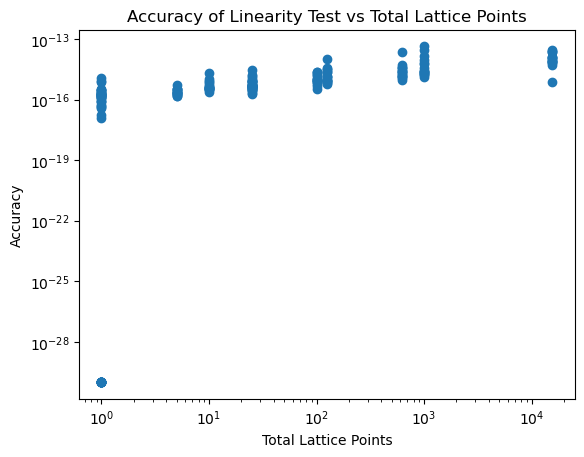

In [37]:
plt.plot(stats_latticepoints, stats_accuracy, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Lattice Points')
plt.ylabel('Accuracy')
plt.title('Accuracy of Linearity Test vs Total Lattice Points')
plt.show()

We see the relative error increases with the total number of lattice points. This is an indication of error propagation due to the nature of the hamiltonian calculation as well calculations during the test, specifically array additions propagating the absolute error.

### Hermiticity

For any wavefunctions $\hat{\Psi}$ and $\hat{\Phi}$  the following equation is true:

$( \hat{\Psi},\hat{H}_a \hat{\Phi}) = ( \hat{H}_a\hat{\Psi}, \hat{\Phi})$

Proof:
Since the sum of two hermitian operators is also hermitian, we will look at the kinetic and the potential Hamiltonian seperately.
Per definition of a complex scalar product and the definition of this particular scalar product, the following must be true for the potential Hamiltonian:

$$ ( \hat{H}_a^{pot}\hat{\Psi}, \hat{\Phi}) = \sum_n (\hat{H}_a^{pot}\hat{\Psi})^\dagger \hat{\Phi} = \sum_n \hat{\Psi}^* \hat{H}_a^{pot*} \hat{\Phi} = \sum_n \hat{\Psi}^* V^* \hat{\Phi}$$ 

And since V is just a real number:

$$\sum_n \hat{\Psi}^* V^* \hat{\Phi} = \sum_n \hat{\Psi}^* V \hat{\Phi} = \sum_n \hat{\Psi}^* \hat{H}_a^{pot} \hat{\Phi} =  ( \hat{\Psi},\hat{H}_a^{pot} \hat{\Phi}) $$

so the potential part of the Hamiltonian is hermitian.

Let's look at the kinetic part:

$$ ( \hat{H}_a^{kin}\hat{\Psi}, \hat{\Phi}) = \sum_n (\hat{H}_a^{kin}\hat{\Psi})^\dagger \hat{\Phi} = \sum_n \sum_k \dfrac{-1}{2\mu\epsilon^2} \left( \hat{\Psi}^*(\mathbf{n}+\mathbf{e}_k) + \hat{\Psi}^* (\mathbf{n}-\mathbf{e}_k) - 2 \hat{\Psi}^*(\mathbf{n}) \right) \hat{\Phi} (\mathbf{n})   $$

$$ = \dfrac{-1}{2\mu\epsilon^2} \sum_k \left( \sum_n \hat{\Psi}^*(\mathbf{n}+\mathbf{e}_k) \hat{\Phi} (\mathbf{n}) + \sum_n \hat{\Psi}^*(\mathbf{n}-\mathbf{e}_k) \hat{\Phi} (\mathbf{n}) - \sum_n \hat{\Psi}^*(\mathbf{n}) \hat{\Phi} (\mathbf{n}) - \sum_n \hat{\Psi}^*(\mathbf{n}) \hat{\Phi} (\mathbf{n})\right)$$

Now we shift the index in the first sum over $\mathbf{n}$ from $\mathbf{n}$ to $\mathbf{n} - \mathbf{e}_k$ and in the second sum over $\mathbf{n}$ from $\mathbf{n}$ to $\mathbf{n} + \mathbf{e}_k$:

$$\dfrac{-1}{2\mu\epsilon^2} \sum_k \left( \sum_n \hat{\Psi}^*(\mathbf{n}) \hat{\Phi} (\mathbf{n}-\mathbf{e}_k) + \sum_n \hat{\Psi}^*(\mathbf{n}) \hat{\Phi} (\mathbf{n}+\mathbf{e}_k) - 2 \sum_n \hat{\Psi}^*(\mathbf{n}) \hat{\Phi} (\mathbf{n}) \right)$$

$$= \dfrac{-1}{2\mu\epsilon^2} \sum_k \sum_n \hat{\Psi}^*(\mathbf{n}) \left(\hat{\Phi} (\mathbf{n}+\mathbf{e}_k) + \hat{\Phi} (\mathbf{n}-\mathbf{e}_k) - 2  \hat{\Phi} (\mathbf{n}) \right) $$

$$= \sum_n \sum_k \hat{\Psi}^*(\mathbf{n}) \dfrac{-1}{2\mu\epsilon^2} \left(\hat{\Phi} (\mathbf{n}+\mathbf{e}_k) + \hat{\Phi} (\mathbf{n}-\mathbf{e}_k) - 2  \hat{\Phi} (\mathbf{n}) \right) $$

$$ = \sum_n \hat{\Psi}^* \hat{H}_a^{kin} \hat{\Phi} = ( \hat{\Psi}, \hat{H}_a^{kin}\hat{\Phi})$$

So both the kinetic and the potential part of the Hamiltonian are hermitian and thus the complete Hamiltonian is also hermitian.


$$ q.e.d.$$

We test the hermiticity hamiltonian function for the parameters previously defined:

In [38]:
stats_latticepoints = []
stats_accuracy = []
for D in [1, 2, 3]:
    for N in [1, 5, 10, 25]:
        for k in range(-1,3):
            for epsilon_2 in [0.001, 0.01, 0.1, 0.95]:

                # Set parameters in the current environemnt                
              
                mu = 10**k
                epsilon_2 = epsilon_2
                
                # Collect stats
                stats_latticepoints.append(N**D)

                # Set global parameters in the functions environment
                functions.N = N
                functions.D = D
                functions.mu = mu
                functions.epsilon_2 = epsilon_2

                # Caluculate potential for given parameters
                functions.potential_array = potential_array_calculator()
                
                # Generate random wavefunctions as complex arrays
                psi = generate_complex_ndarray(N,D)
                phi = generate_complex_ndarray(N,D)

                # Calculate two terms to be compared
                Psi_H_Phi = np.vdot(psi,hamiltonian_function(phi))
                H_Psi_Phi = np.vdot(hamiltonian_function(psi),phi)
                
                
                # This precision has only technical reason, no physical meaning
                relative_tolerance= 1.e-30
                try:
                    # Assert two terms are equal    
                    np.testing.assert_allclose(Psi_H_Phi, H_Psi_Phi, atol = 0, rtol=relative_tolerance, err_msg=str, verbose=False)
                except AssertionError as e:    
                    print(colored(fr"""The test of unitarity passed  with {str(e).splitlines()[-1]} for parameters:
D={D} N={N} mu={mu} epsilon_2={epsilon_2}""", "green"))
                    stats_accuracy.append(float( str(e).splitlines()[-1].split(":")[1].strip()))                    
                else:
                    print(colored(fr"""The test of unitarity passed with relative precision greater than {relative_tolerance} for parameters:
D={D} N={N} mu={mu} epsilon_2={epsilon_2}""", 'green'))  
                    stats_accuracy.append(relative_tolerance)  

The test of unitarity passed  with Max relative difference: 1.1608683e-17 for parameters:
D=1 N=1 mu=0.1 epsilon_2=0.001
The test of unitarity passed with relative precision greater than 1e-30 for parameters:
D=1 N=1 mu=0.1 epsilon_2=0.01
The test of unitarity passed  with Max relative difference: 1.29524172e-16 for parameters:
D=1 N=1 mu=0.1 epsilon_2=0.1
The test of unitarity passed with relative precision greater than 1e-30 for parameters:
D=1 N=1 mu=0.1 epsilon_2=0.95
The test of unitarity passed with relative precision greater than 1e-30 for parameters:
D=1 N=1 mu=1 epsilon_2=0.001
The test of unitarity passed with relative precision greater than 1e-30 for parameters:
D=1 N=1 mu=1 epsilon_2=0.01
The test of unitarity passed with relative precision greater than 1e-30 for parameters:
D=1 N=1 mu=1 epsilon_2=0.1
The test of unitarity passed with relative precision greater than 1e-30 for parameters:
D=1 N=1 mu=1 epsilon_2=0.95
The test of unitarity passed  with Max relative difference:

As before, we observe the tests produce varying relative errors. We shall visualize them for again as a function of the lattice points:

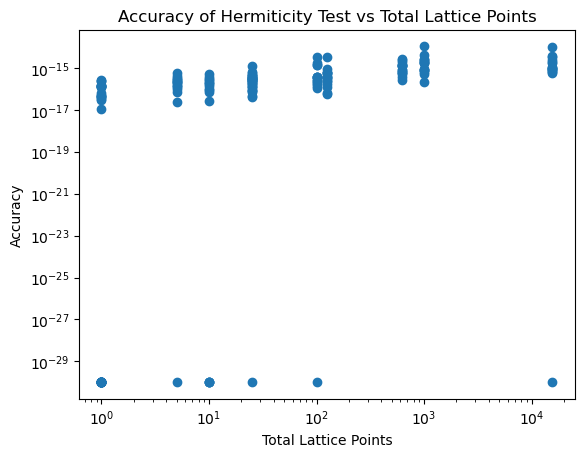

In [39]:
plt.plot(stats_latticepoints, stats_accuracy, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Lattice Points')
plt.ylabel('Accuracy')
plt.title('Accuracy of Hermiticity Test vs Total Lattice Points')
plt.show()

We see the relative error increases with the total number of lattice points. This is an indication of error propagation due to the nature of the hamiltonian calculation as well calculations during the test, specifically array multiplication. \
In this test, the total error is slightly lower compared to test of linearity due to the array product propagating the relative error.


### Positivity

For any wavefunctions $\hat{\Psi}$, while $V\ge 0$   the following equation is true:

$( \hat{\Psi},\hat{H}_a \hat{\Psi}) \ge 0$

Proof:

If $V \ge 0$, we can ignore it for the proof, as it will contribute parts which are already $\ge 0$: 

$$ ( \hat{\Psi},\hat{H}_a^{pot} \hat{\Psi}) = V ( \hat{\Psi}, \hat{\Psi}) \ge 0$$

Since $V\ge 0$ and $( \hat{\Psi}, \hat{\Psi})\ge 0$ per definition of a scalar product.

Thus we will only look at the kinetic part of the Hamiltonian:

$$ ( \hat{\Psi},\hat{H}_a^{kin} \hat{\Psi}) = \sum_n \hat{\Psi}^* \hat{H}_a^{kin} \hat{\Psi}$$
$$ = \sum_n \hat{\Psi}^* \left( \dfrac{-1}{2\mu\epsilon^2}\sum_k \hat{\Psi}(\mathbf{n}+\mathbf{e}_k) + \hat{\Psi} (\mathbf{n}-\mathbf{e}_k) - 2 \hat{\Psi}(\mathbf{n})\right)$$
$$ = \dfrac{-1}{2\mu\epsilon^2} \sum_n  \sum_k \hat{\Psi}^* \left(\hat{\Psi}(\mathbf{n}+\mathbf{e}_k)-\hat{\Psi}(\mathbf{n}) - (\hat{\Psi}(\mathbf{n})-\hat{\Psi}(\mathbf{n}-\mathbf{e}_k))  \right)$$

$$ = \dfrac{-1}{2\mu\epsilon^2} \sum_k  \left[\sum_n \hat{\Psi}^* (\mathbf{n}) \left(\hat{\Psi}(\mathbf{n}+\mathbf{e}_k) -\hat{\Psi}(\mathbf{n})\right) - \sum_n \hat{\Psi}^* (\mathbf{n}) \left(\hat{\Psi}(\mathbf{n}) - \hat{\Psi}(\mathbf{n}-\mathbf{e}_k)\right) \right]$$

We will now shift the index in the second sum over $\mathbf{n}$ from $\mathbf{n}$ to $\mathbf{n} + \mathbf{e}_k$:

$$ = \dfrac{-1}{2\mu\epsilon^2} \sum_k  \left[\sum_n \hat{\Psi}^* (\mathbf{n}) \left(\hat{\Psi}(\mathbf{n}+\mathbf{e}_k) -\hat{\Psi}(\mathbf{n})\right) - \sum_n \hat{\Psi}^* (\mathbf{n}+\mathbf{e}_k) \left(\hat{\Psi}(\mathbf{n}+\mathbf{e}_k) - \hat{\Psi}(\mathbf{n})\right) \right]$$
$$ = \dfrac{-1}{2\mu\epsilon^2} \sum_k  \sum_n \left(\hat{\Psi}^*(\mathbf{n}) - \hat{\Psi}^*(\mathbf{n}+\mathbf{e}_k)  \right) \left(  \hat{\Psi}(\mathbf{n}+\mathbf{e}_k) - \hat{\Psi}(\mathbf{n})  \right)$$

$$ = \dfrac{1}{2\mu\epsilon^2} \sum_k  \sum_n \left(\hat{\Psi}^*(\mathbf{n}+\mathbf{e}_k) - \hat{\Psi}^*(\mathbf{n})  \right) \left(  \hat{\Psi}(\mathbf{n}+\mathbf{e}_k) - \hat{\Psi}(\mathbf{n})  \right)$$

$$ = \dfrac{1}{2\mu\epsilon^2} \sum_k  \sum_n \left| \hat{\Psi}(\mathbf{n}+\mathbf{e}_k) - \hat{\Psi}(\mathbf{n})  \right|^2$$

And since the $\mu,\epsilon$ and the squares we are summing over are all $\ge 0$, we know that:

$$ ( \hat{\Psi},\hat{H}_a^{kin} \hat{\Psi}) \ge 0$$

and thus

$$ ( \hat{\Psi},\hat{H}_a \hat{\Psi}) = ( \hat{\Psi},\hat{H}_a^{kin} \hat{\Psi}) + ( \hat{\Psi},\hat{H}_a^{pot} \hat{\Psi}) \ge 0$$

$$q.e.d$$

We test the positivity hamiltonian function for the parameters previously defined:

In [40]:
for D in [1, 2, 3]:
    for N in [1, 5, 10, 25]:
        for k in range(-1,3):
            for epsilon_2 in [0.001, 0.01, 0.1, 0.95]:

                # Set parameters in the current environemnt                
              
                mu = 10**k
                epsilon_2 = epsilon_2
                
                # Collect stats
                stats_latticepoints.append(N**D)

                # Set global parameters in the functions environment
                functions.N = N
                functions.D = D
                functions.mu = mu
                functions.epsilon_2 = epsilon_2

                # Caluculate potential for given parameters
                functions.potential_array = potential_array_calculator()


                # generate random wavefunctions as complex arrays
                psi = generate_complex_ndarray(N,D)

                # assert equation is true
                assert   np.vdot(psi,kinetic_energy_function(psi))>=0
                assert   np.vdot(psi,hamiltonian_function(psi))>=0
                print(colored(fr"""The test of positivity passed for parameters:
D={D} N={N} mu={mu} epsilon_2={epsilon_2}""", "green"))

The test of positivity passed for parameters:
D=1 N=1 mu=0.1 epsilon_2=0.001
The test of positivity passed for parameters:
D=1 N=1 mu=0.1 epsilon_2=0.01
The test of positivity passed for parameters:
D=1 N=1 mu=0.1 epsilon_2=0.1
The test of positivity passed for parameters:
D=1 N=1 mu=0.1 epsilon_2=0.95
The test of positivity passed for parameters:
D=1 N=1 mu=1 epsilon_2=0.001
The test of positivity passed for parameters:
D=1 N=1 mu=1 epsilon_2=0.01
The test of positivity passed for parameters:
D=1 N=1 mu=1 epsilon_2=0.1
The test of positivity passed for parameters:
D=1 N=1 mu=1 epsilon_2=0.95
The test of positivity passed for parameters:
D=1 N=1 mu=10 epsilon_2=0.001
The test of positivity passed for parameters:
D=1 N=1 mu=10 epsilon_2=0.01
The test of positivity passed for parameters:
D=1 N=1 mu=10 epsilon_2=0.1
The test of positivity passed for parameters:
D=1 N=1 mu=10 epsilon_2=0.95
The test of positivity passed for parameters:
D=1 N=1 mu=100 epsilon_2=0.001
The test of positivity 

### Eigenvalues and eingenvectors

If $V =  0$ then the plane waves described by:

 $\hat{\Psi}_{k}({n})=\mathrm{e}^{\frac{2\pi i \mathbf{n} \mathbf{k}}{N}}\space, \space {\mathbf{k}} \in \mathbb{Z}^D$,

are the eigenfunctions of $\hat{H}_a$. As such the eigenvalue equation is fullfilled:


$\hat{H}_a \hat{\Psi}_{k} = E_{k}\hat{\Psi}_{k}$

Proof:

Test if $\hat{\Psi}_{k}({n})=\frac{2\pi i {\mathbf{n}} {\mathbf{k}}}{N}$ really are Eigenfunctions of $\hat{H}_a$ for $V=0$.

$$\hat{H}_a \hat{\Psi}_{k} = \dfrac{-1}{2\mu\epsilon^2}\sum_j \hat{\Psi}_{k}(\mathbf{n}+\mathbf{e}_j) + \hat{\Psi}_{k} (\mathbf{n}-\mathbf{e}_j) - 2 \hat{\Psi}_{k}(\mathbf{n})$$

$$= \dfrac{-1}{2\mu\epsilon^2}\sum_j \mathrm{e}^{\dfrac{2\pi i (\mathbf{n}+\mathbf{e}_j)\mathbf{k}}{N}} + \mathrm{e}^{\dfrac{2\pi i (\mathbf{n}-\mathbf{e}_j)\mathbf{k}}{N}} - 2 \mathrm{e}^{\dfrac{2\pi i \mathbf{n}\mathbf{k}}{N}} $$

$$ = \dfrac{-1}{2\mu\epsilon^2}\sum_j  \mathrm{e}^{\dfrac{2\pi i \mathbf{n}\mathbf{k}}{N}} \left( \mathrm{e}^{\dfrac{2\pi i \mathbf{e}_j\mathbf{k}}{N}} + \mathrm{e}^{\dfrac{-2\pi i \mathbf{e}_j\mathbf{k}}{N}} - 2\right)$$

$$ = \hat{\Psi}_{k} \left( \dfrac{-1}{2\mu\epsilon^2}\sum_j \mathrm{e}^{\dfrac{2\pi i \mathbf{e}_j\mathbf{k}}{N}} + \mathrm{e}^{\dfrac{-2\pi i \mathbf{e}_j\mathbf{k}}{N}} - 2\right)  $$

$$ = \hat{\Psi}_{k} \dfrac{-1}{\mu\epsilon^2}\sum_j \left( \cos\left(\dfrac{2\pi  \mathbf{e}_j\mathbf{k}}{N}\right) - 1\right)$$

Whereby the eigenvalues to the eigenfunctions $\hat{\Psi}_{k}({n})=\frac{2\pi i {\mathbf{n}} {\mathbf{k}}}{N}$ :

$$ E_{k} =  \sum_j \left( \cos\left(\dfrac{2\pi  \mathbf{e}_j\mathbf{k}}{N}\right) - 1\right)$$



In [48]:
stats_latticepoints = []
stats_accuracy = []
stats_mu = []
stats_epsilon_2 = []
for D in [1, 2, 3]:
    for N in [1, 6, 10, 25]:
        for k in range(-1,3):
            for epsilon_2 in [0.001, 0.01, 0.1, 0.95]:

                # Set parameters in the current environemnt                
              
                mu = 10**k
                epsilon_2 = epsilon_2
                
                # Collect stats
                stats_latticepoints.append(N**D)
                stats_mu.append(mu)
                stats_epsilon_2.append(epsilon_2)
                # Set global parameters in the functions environment
                functions.N = N
                functions.D = D
                functions.mu = mu
                functions.epsilon = np.sqrt(epsilon_2)
                functions.epsilon_2 = epsilon_2

                # Caluculate potential for given parameters
                functions.potential_array = potential_array_calculator()

                # Initialize plane wave with according dimensions
                wavenumber =np.random.randint(0,100,size = (D,))
                psi = generate_plane_wave((tuple(wavenumber)))

                # Apply kinetic energy operator to psi
                H_Psi = kinetic_energy_function(psi)
                
                # Determine eigenvalue by dividing H_Psi by original wavefunction
                E=(H_Psi/psi).real
                eigenvalue_analytical = 1/(mu*epsilon_2)*np.sum(1-np.cos(2*np.pi*wavenumber/N))
                
                # Assert all values of E are the same. Is this the case, then psi is a eigenfunction of the kinetic energy operator     
                relative_tolerance= 1e-30
                try:
                    # Assert all values of E are the same. Is this the case, then psi is a eigenfunction of the kinetic energy operator     
                    print(f'Absolute difference between calculated eigenvalue and analytically determined eigenvalue: {E.ravel()[-1]-eigenvalue_analytical} ')
                    np.testing.assert_allclose(E, E.ravel()[0], atol = 0, rtol=relative_tolerance, err_msg=str, verbose=False)
                except AssertionError as e:
                    print(colored(fr"""The test of unitarity passed  with {str(e).splitlines()[-1]} for parameters:
D={D} N={N} mu={mu} epsilon_2={epsilon_2}""", "green"))
                    stats_accuracy.append(float( str(e).splitlines()[-1].split(":")[1].strip()))                    
                else:
                    print(colored(fr"""The test of unitarity passed with relative precision greater than {relative_tolerance} for parameters:
D={D} N={N} mu={mu} epsilon_2={epsilon_2}""", 'green'))  
                    stats_accuracy.append(relative_tolerance)


Absolute difference between calculated eigenvalue and analytically determined eigenvalue: 0.0 
The test of unitarity passed with relative precision greater than 1e-30 for parameters:
D=1 N=1 mu=0.1 epsilon_2=0.001
Absolute difference between calculated eigenvalue and analytically determined eigenvalue: 0.0 
The test of unitarity passed with relative precision greater than 1e-30 for parameters:
D=1 N=1 mu=0.1 epsilon_2=0.01
Absolute difference between calculated eigenvalue and analytically determined eigenvalue: 0.0 
The test of unitarity passed with relative precision greater than 1e-30 for parameters:
D=1 N=1 mu=0.1 epsilon_2=0.1
Absolute difference between calculated eigenvalue and analytically determined eigenvalue: 0.0 
The test of unitarity passed with relative precision greater than 1e-30 for parameters:
D=1 N=1 mu=0.1 epsilon_2=0.95
Absolute difference between calculated eigenvalue and analytically determined eigenvalue: 0.0 
The test of unitarity passed with relative precision 

As before, we observe the tests produce varying relative errors. We shall visualize them as a function of total lattice points:

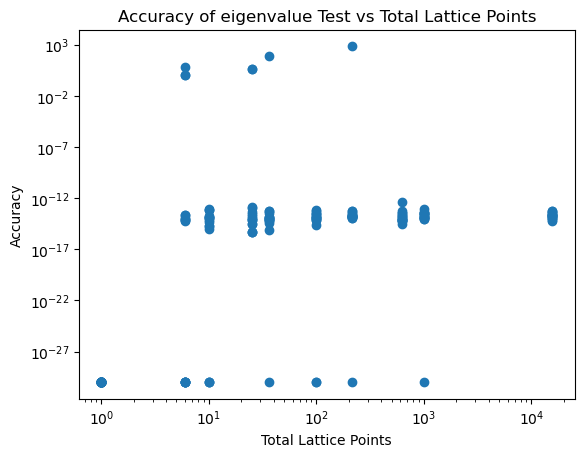

In [47]:
plt.plot(stats_latticepoints, stats_accuracy, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Lattice Points')
plt.ylabel('Accuracy')
plt.title('Accuracy of eigenvalue Test vs Total Lattice Points')
plt.show()